In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [ ]:
heart_rate = pd.read_csv('heart_rate.csv')
temperature = pd.read_csv('temperatura.txt', delimiter="\t")

In [9]:
print("=== HEART RATE DATA ===")
print(f"Shape: {heart_rate.shape}")
print(heart_rate.head())
print("\nInfo:")
print(heart_rate.info())

=== HEART RATE DATA ===
Shape: (1800, 4)
        T1       T2       T3       T4
0  84.2697  91.4634  60.4839  59.2885
1  84.2697  91.4634  60.4839  59.2885
2  84.0619  91.1834  60.4606  59.2885
3  85.6542  91.8788  60.3391  58.8973
4  87.2093  91.1772  60.0762  58.4359

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      1800 non-null   float64
 1   T2      1800 non-null   float64
 2   T3      950 non-null    float64
 3   T4      891 non-null    float64
dtypes: float64(4)
memory usage: 56.4 KB
None


In [10]:
print("=== Temperature DATA ===")
print(f"Shape: {temperature.shape}")
print(temperature.head())
print("\nInfo:")
print(temperature.info())

=== Temperature DATA ===
Shape: (130, 3)
   Temperatura Sesso  Freq_cardiaca
0         96.3     U             70
1         96.7     U             71
2         96.9     U             74
3         97.0     U             80
4         97.1     U             73

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperatura    130 non-null    float64
 1   Sesso          130 non-null    object 
 2   Freq_cardiaca  130 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB
None


In [ ]:
def clean_heart_rate(df):
    # Vérification des valeurs manquantes
    print("Valeurs manquantes par colonne:")
    print(df.isnull().sum())
    
    # Vérification des doublons
    print(f"Doublons: {df.duplicated().sum()}")
    
    # Statistiques descriptives
    print("\nStatistiques descriptives:")
    print(df.describe())
    
    # Détection des outliers avec IQR 
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    print(f"\nOutliers détectés: {outliers}")
    
    return df

heart_rate_clean = clean_heart_rate(heart_rate)

Valeurs manquantes par colonne:
T1      0
T2      0
T3    850
T4    909
dtype: int64
Doublons: 4

Statistiques descriptives:
                T1           T2          T3          T4
count  1800.000000  1800.000000  950.000000  891.000000
mean     92.596114    96.637474   58.673231   58.515133
std       5.489339     5.687179    3.410240    3.484603
min      73.436600    80.213900   52.083300   52.915300
25%      88.847400    92.418925   56.551875   56.345300
50%      92.205400    98.238450   58.388450   57.731600
75%      96.399025   101.362750   60.167675   59.845300
max     106.756000   104.895000   75.473300   77.424400

Outliers détectés: T1     3
T2     0
T3    39
T4    39
dtype: int64


In [45]:
def clean_temperature(df):   
     
    # Vérification des valeurs manquantes
    print("Valeurs manquantes:")
    print(df.isnull().sum())
    
    # Encodage de la variable catégorielle 'Sesso'
    le = LabelEncoder()
    df['Sesso_encoded'] = le.fit_transform(df['Sesso'])
    
    # Vérification des valeurs aberrantes pour la température
    temp_outliers = df[(df['Temperatura'] < 95) | (df['Temperatura'] > 107.6)]
    print(f"Températures aberrantes: {len(temp_outliers)}")
    
    # Vérification des fréquences cardiaques aberrantes
    hr_outliers = df[(df['Freq_cardiaca'] < 40) | (df['Freq_cardiaca'] > 200)]
    print(f"Fréquences cardiaques aberrantes: {len(hr_outliers)}")
    
    return df

temperature_clean = clean_temperature(temperature)

Valeurs manquantes:
Temperatura      0
Sesso            0
Freq_cardiaca    0
Sesso_encoded    0
Temperatura_C    0
dtype: int64
Températures aberrantes: 0
Fréquences cardiaques aberrantes: 0



**Normalisation des Données**

In [57]:
def normalize_data(df, exclude_columns=[]):
    scaler = StandardScaler()

    # Sélection des colonnes numériques à normaliser
    numeric_cols = df.select_dtypes(include=[np.number]).columns 
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_columns]

    #Normalization
    df_normalized = df.copy()
    df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols]) 
    return df_normalized , scaler

In [55]:
# Normalisation des données de Heart Rates
heart_rate_normalized, hr_scaler = normalize_data(heart_rate_clean)
# Normalisation des données de Temperature
temperature_normalized, temp_scaler = normalize_data(temperature_clean.drop('Sesso', axis=1),exclude_columns=['Sesso_encoded'])

In [62]:
from sklearn.preprocessing import MinMaxScaler

def minmax_normalize(df, exclude_columns=[]):
    """Normalisation Min-Max (0-1)"""
    minmax_scaler = MinMaxScaler()
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_columns]
    
    df_minmax = df.copy()
    df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])
    
    return df_minmax, minmax_scaler

# Application Min-Max
heart_rate_minmax, hr_minmax_scaler = minmax_normalize(heart_rate_clean)

**Visualisation de la Qualité des Données**

C:\Users\PC\AppData\Local\Temp\ipykernel_18196\150787322.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axes[0, 1], bins=20)


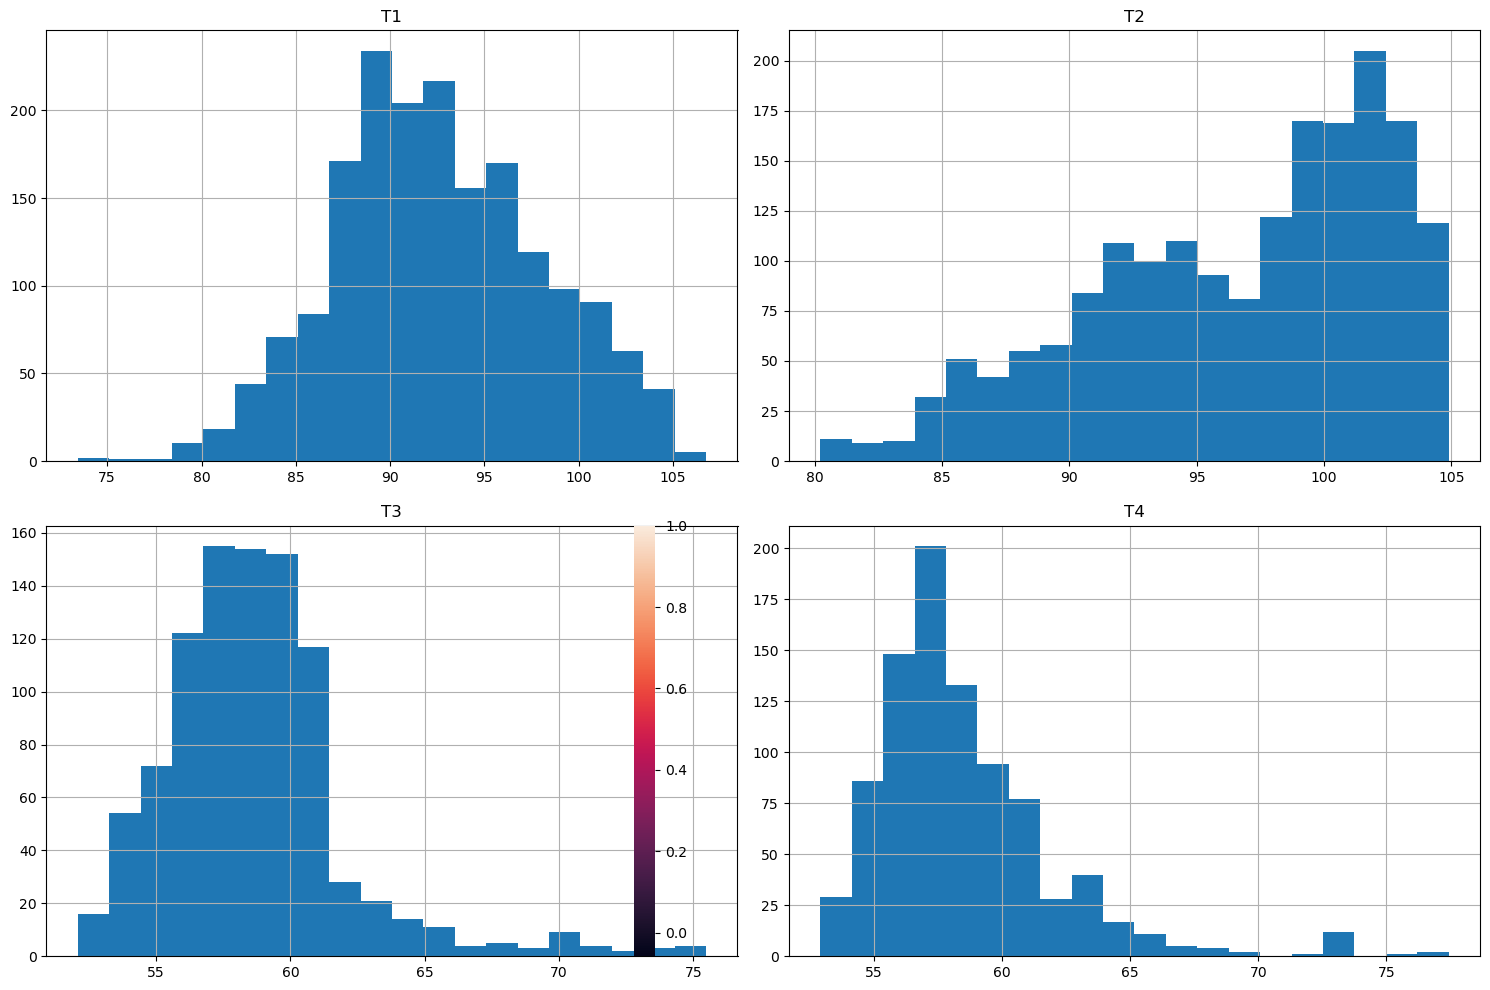

C:\Users\PC\AppData\Local\Temp\ipykernel_18196\150787322.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axes[0, 1], bins=20)


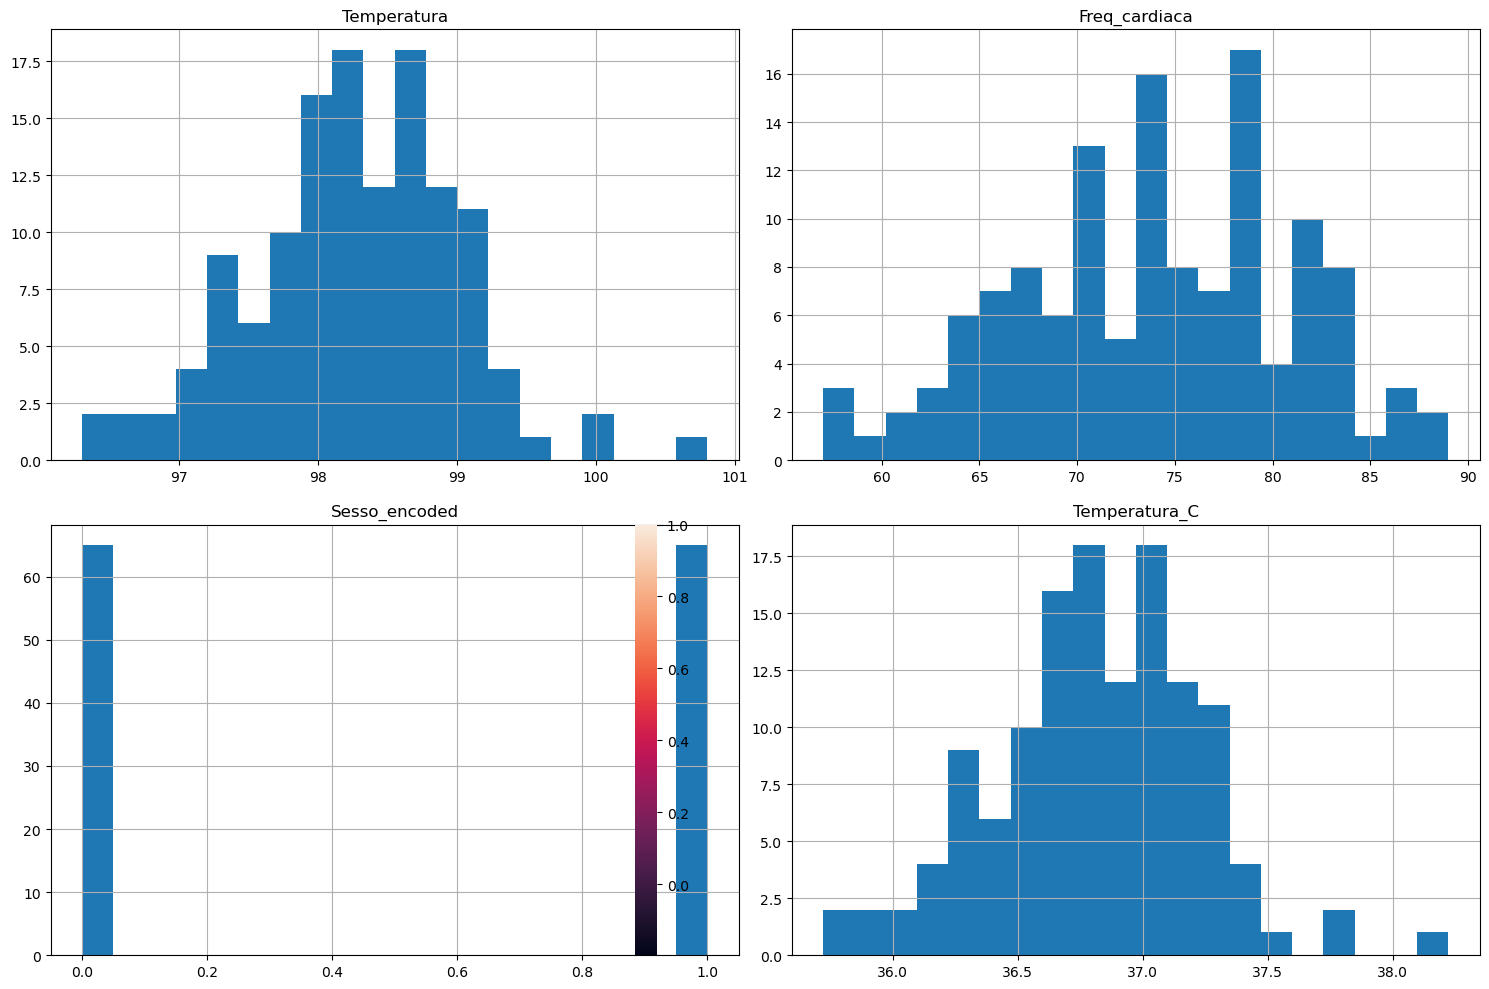

In [59]:
def plot_data_quality(df, title):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Boxplot avant nettoyage
    df.boxplot(ax=axes[0, 0])
    axes[0, 0].set_title(f'Boxplot - {title}')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Distribution
    df.hist(ax=axes[0, 1], bins=20)
    axes[0, 1].set_title(f'Distribution - {title}')
    
    # Matrice de corrélation
    if df.select_dtypes(include=[np.number]).shape[1] > 1:
        sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
                   annot=True, ax=axes[1, 0])
        axes[1, 0].set_title(f'Corrélation - {title}')
    
    # Valeurs manquantes
    missing = df.isnull().sum()
    axes[1, 1].bar(missing.index, missing.values)
    axes[1, 1].set_title(f'Valeurs manquantes - {title}')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_data_quality(heart_rate_clean, "Heart Rate Data")
plot_data_quality(temperature_clean, "Temperature Data")

In [60]:
# Sauvegarde des données nettoyées
heart_rate_clean.to_csv('heart_rate_cleaned.csv', index=False)
temperature_clean.to_csv('temperature_cleaned.csv', index=False)
heart_rate_normalized.to_csv('heart_rate_normalized.csv', index=False)
temperature_normalized.to_csv('temperature_normalized.csv', index=False)

print("✅ Données nettoyées et normalisées sauvegardées!")

✅ Données nettoyées et normalisées sauvegardées!
